In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
car_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Car Price/car data.csv")

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.shape

(301, 9)

In [ ]:
#info collecting about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#checking number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#chedking the distribution of categorical data
print (car_dataset.Fuel_Type.value_counts())
print (car_dataset.Seller_Type.value_counts())
print (car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
#making texts to numerical value
#encoding 
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1, 'CNG':2}}, inplace=True)

car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)

car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)



In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting train testing


In [ ]:
x=car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
y=car_dataset['Selling_Price']

In [ ]:
print (x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print (y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.1, random_state=2)

In [ ]:
#loading linear regression
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#evaluation
training_data_prediction = lin_reg_model.predict(x_train)

In [ ]:
#r sqarred error
error_score = metrics.r2_score(y_train, training_data_prediction)

R^2 (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always
predicts the expected value of y, disregarding the input features,
would get a R^2 score of 0.0

In [ ]:
print(error_score)

0.8799451660493711


in regression r score is used. when accuracy for classification problem

Visualize the actual and predicted prices

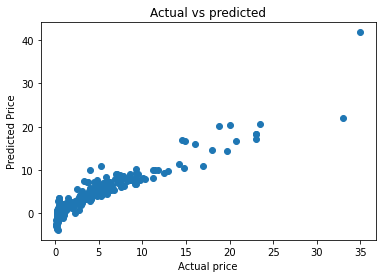

In [ ]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual vs predicted')
plt.show()

In [ ]:
testing_data_prediction = lin_reg_model.predict(x_test)

In [ ]:
#r sqarred error
error_score = metrics.r2_score(y_test, testing_data_prediction)
print(error_score)

0.8365766715027051


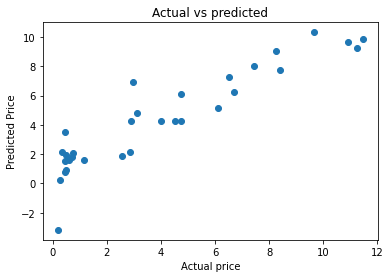

In [ ]:
plt.scatter(y_test, testing_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual vs predicted')
plt.show()

Lasso Regression

In [ ]:
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(x_train, y_train)

Lasso()

In [ ]:
training_data_prediction = lass_reg_model.predict(x_train)

In [ ]:
error_score = metrics.r2_score(y_train, training_data_prediction)

In [ ]:
print(error_score)

0.8427856123435794


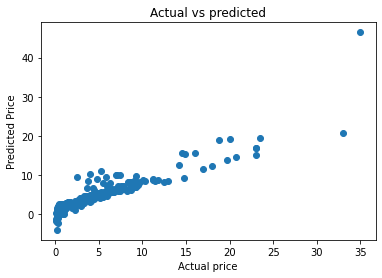

In [ ]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual vs predicted')
plt.show()

In [ ]:
testing_data_prediction = lass_reg_model.predict(x_test)

In [ ]:
error_score = metrics.r2_score(y_train, training_data_prediction)

In [ ]:
print(error_score)

0.8427856123435794


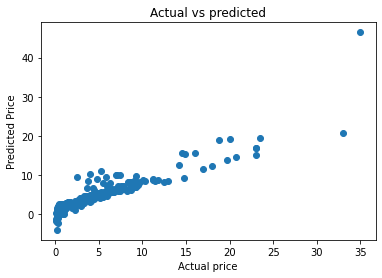

In [ ]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual vs predicted')
plt.show()